# Project: No-show Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

* Look at my dataset. 

In [2]:
df = pd.read_csv('appointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


* Look at the shape.

In [3]:
df.shape

(110527, 14)

* Look at the summary statistics.

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* Find missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* Look at the entire data frame.

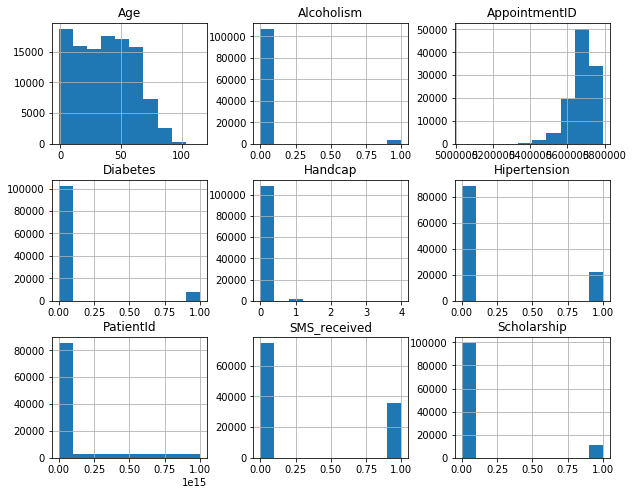

In [6]:
df.hist(figsize=(10,8));


### Data Cleaning by dropping several columns

* Drop the columns I'm not going to use.

In [7]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis=1, inplace=True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Is there any direct correlation between age and no-show appointments?

* Create masks for rows where the patient showed up to their appointment and rows where they did not.

In [8]:
show = df["No-show"] == "No"
noshow = df["No-show"] == "Yes"

* Look at the __average age__ of the patient who __showed up__ to their appointment. 

In [9]:
df.Age[show].mean()

37.790064393252315

* Look at the __average age__ of the patient who __didn't show up__ to their appointment.

In [10]:
df.Age[noshow].mean()

34.317666562121957

* Look at the __age distribution__ and compare them in a visual.

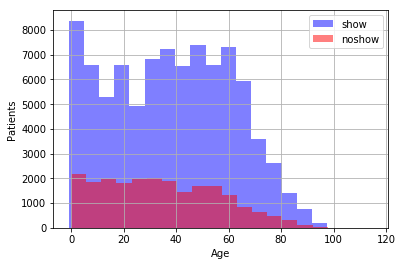

In [11]:
df.Age[show].hist(alpha=0.5, bins=20, color='blue', label='show');
df.Age[noshow].hist(alpha=0.5, bins=20, color='red', label='noshow');
plt.xlabel('Age');
plt.ylabel('Patients');
plt.legend();

### 2. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

* Look at the relationship between __no-show appointments__ and __Gender__.

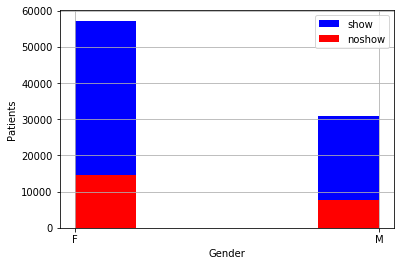

In [12]:
df.Gender[show].hist(alpha=1, bins=5, color='blue', label='show')
df.Gender[noshow].hist(alpha=1, bins=5, color='red', label='noshow');
plt.xlabel('Gender');
plt.ylabel('Patients');
plt.legend();

* Look at the relationship between __no-show appointments__ and __SMS_received__.

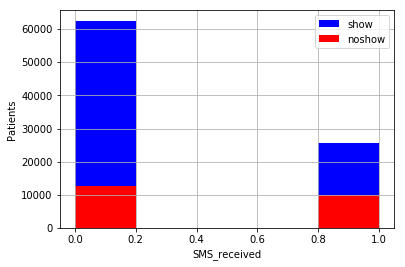

In [13]:
df.SMS_received[show].hist(alpha=1, bins=5, color='blue', label='show')
df.SMS_received[noshow].hist(alpha=1, bins=5, color='red', label='noshow');
plt.xlabel('SMS_received');
plt.ylabel('Patients');
plt.legend();

* Look at the relationship between __no-show appointments__ and __Alcoholism__.

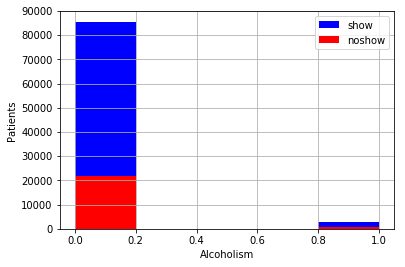

In [14]:
df.Alcoholism[show].hist(alpha=1, bins=5, color='blue', label='show')
df.Alcoholism[noshow].hist(alpha=1, bins=5, color='red', label='noshow');
plt.xlabel('Alcoholism');
plt.ylabel('Patients');
plt.legend();

* Look at the relationship between __no-show appointments__ and __Diabetes__.

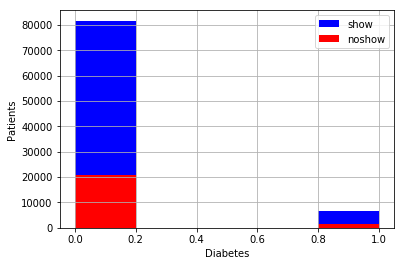

In [15]:
df.Diabetes[show].hist(alpha=1, bins=5, color='blue', label='show')
df.Diabetes[noshow].hist(alpha=1, bins=5, color='red', label='noshow');
plt.xlabel('Diabetes');
plt.ylabel('Patients');
plt.legend();

* Look at the relationship between __no-show appointments__ and __Handcap__.

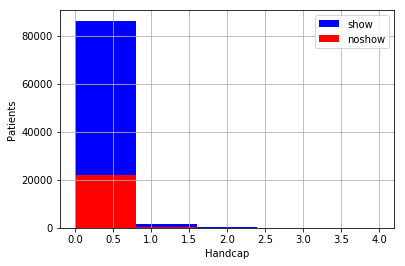

In [16]:
df.Handcap[show].hist(alpha=1, bins=5, color='blue', label='show')
df.Handcap[noshow].hist(alpha=1, bins=5, color='red', label='noshow');
plt.xlabel('Handcap');
plt.ylabel('Patients');
plt.legend();

* Look at the relationship between __no-show appointments__ and __Hipertension__.

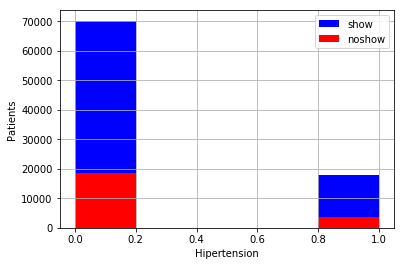

In [17]:
df.Hipertension[show].hist(alpha=1, bins=5, color='blue', label='show')
df.Hipertension[noshow].hist(alpha=1, bins=5, color='red', label='noshow');
plt.xlabel('Hipertension');
plt.ylabel('Patients');
plt.legend();

* Look at the relationship between __no-show appointments__ and __Scholarship__.

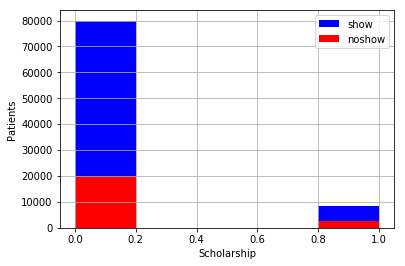

In [18]:
df.Scholarship[show].hist(alpha=1, bins=5, color='blue', label='show')
df.Scholarship[noshow].hist(alpha=1, bins=5, color='red', label='noshow');
plt.xlabel('Scholarship');
plt.ylabel('Patients');
plt.legend();

<a id='conclusions'></a>
## Conclusions

1. There’s no correlation between age and no-show appointments.

* The __average age__ of the patient who showed up to their appointment is similar to that of the patient who didn’t show up to their appointment.
* The __age distribution__ of the patient who showed up to their appointment is similar to that of the patient who didn’t show up to their appointment.

2. Three factors, ‘SMS_received’, ‘Alcoholism’, ‘Handcap’,are important for us to know in order to predict if a patient will show up for their scheduled appointment.

* The number of the patient who showed up to their appointment is bigger than that of the patient who didn’t show up to their appointment with or without every factor, such as __‘Gender’, ‘SMS_received’, ‘Alcoholism’, ‘Diabetes’, ‘Handcap’, ‘Hipertenstion’, ‘Scholarship’__. 
* However, People without three factors, such as __‘SMS_received’, ‘Alcoholism’, ‘Handcap’__, have a larger proportion of the patient who showed up to their appointment than people without these factors.


In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0